<a href="https://colab.research.google.com/github/A01732830/Actividad-4/blob/main/Actividad4_2_Regresion_Lineal_m%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde archivo .csv sin indice
data=pd.read_csv("microretailer_mit_lift_lab_actualizado.csv")
data.head()

In [17]:
#Rellenamos nulos

df =data.fillna(method="bfill")
df =data.fillna(method="ffill")

Primer caso

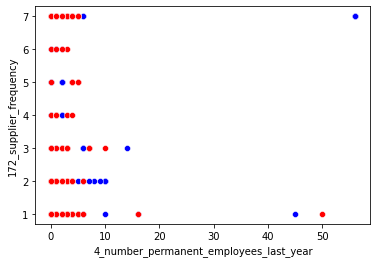

In [23]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='4_number_permanent_employees_last_year', y='172_supplier_frequency', color="blue", data=df)
sns.scatterplot(x='2_current_permanent_employees', y='172_supplier_frequency', color="red", data=df)

In [24]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['4_number_permanent_employees_last_year', '2_current_permanent_employees']]
Var_Dep= df['172_supplier_frequency']

In [25]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()

In [26]:
#Verificamos la función relacionada al modelo
type(modelo)

sklearn.linear_model._base.LinearRegression

In [27]:
#Ajustamos el modelo con las variables antes declaradas
modelo.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [28]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['4_number_permanent_employees_last_year',
        '2_current_permanent_employees'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.07167257, -0.03485462]),
 '_residues': 1557.086674285376,
 'rank_': 2,
 'singular_': array([145.52588017,  50.85392052]),
 'intercept_': 2.5333499160995703}

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
modelo.score(Vars_Indep,Var_Dep)

0.055341291584613206

**MODELO PREDICTIVO**



In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= modelo.predict(X=df[['4_number_permanent_employees_last_year', '2_current_permanent_employees']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

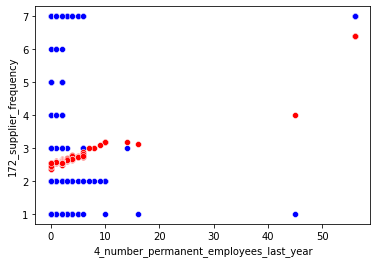

In [35]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='4_number_permanent_employees_last_year', y='172_supplier_frequency', color="blue", data=df)
sns.scatterplot(x='4_number_permanent_employees_last_year', y='Predicciones', color="red", data=df)
#sns.lineplot(x='268_number_fridges', y='Predicciones', color="red", data=df)

In [36]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=modelo.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.055341291584613206

In [37]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2352472987828196